# Introduction to Unsupervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 13)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1) Clustering

First let's load the iris data set, which is included in `scikit-learn`, and read its description. The `iris` object below acts like a dictionary that includes tabular data along with some metadata.

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**Problem 1a** Make a pair plot (a.k.a. scatter matrix, a.k.a. corner plot) showing all four features plotted against each other. You can do this any way you want, but I suggest using `pandas.plotting.scatter_matrix` or `seaborn.pairplot` instead of `corner.corner` because there are so few points.

Text(0.5, 1, 'pair plot for iris data, all units in cm')

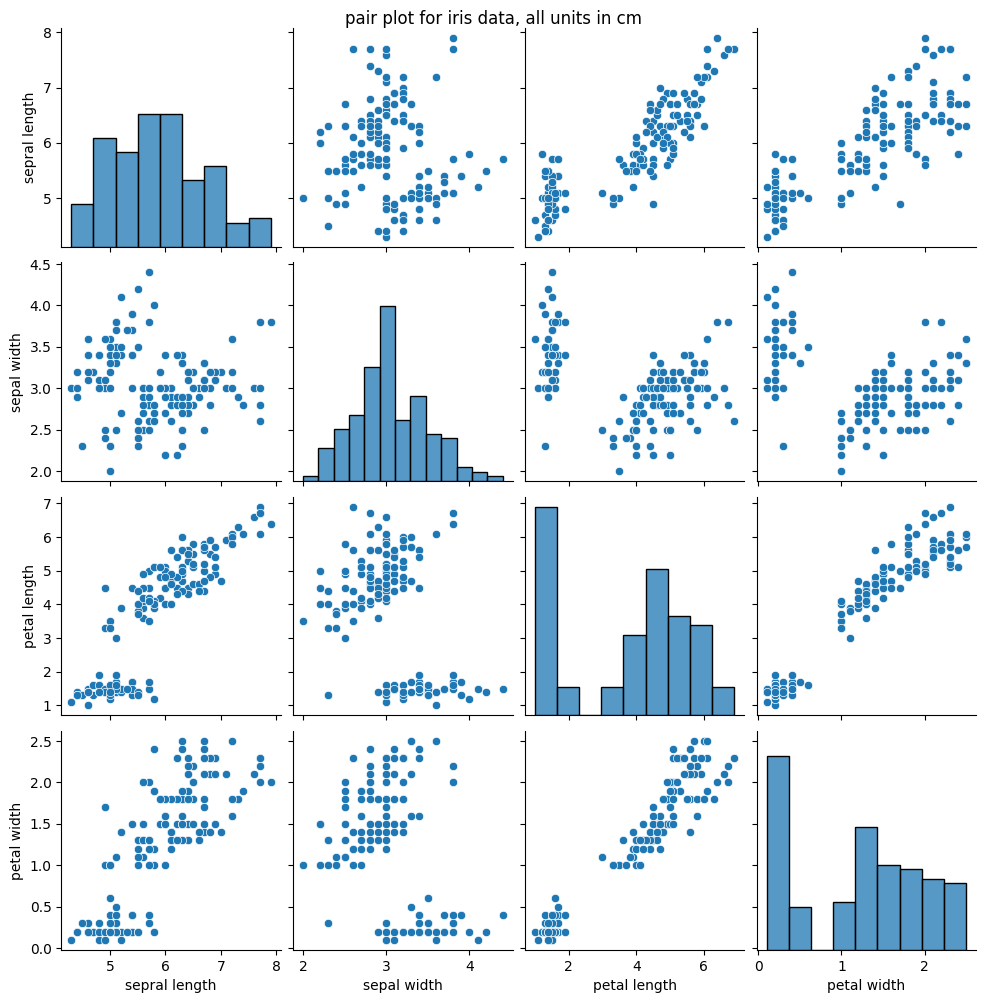

In [10]:
import seaborn as sns
import pandas as pd


#sns.pairplot(iris)

#iris_p = sns.load_dataset(iris)

iris_p = pd.DataFrame(iris['data'], columns =[ 'sepral length','sepal width','petal length','petal width'])
sns.pairplot(iris_p)
plt.suptitle("pair plot for iris data, all units in cm", y=1)

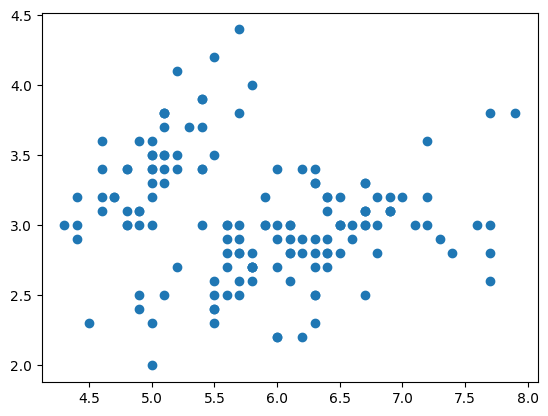

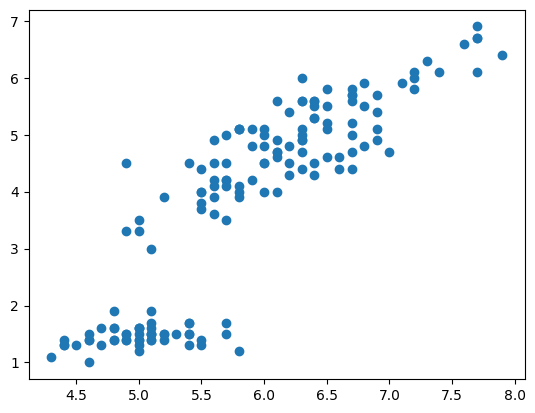

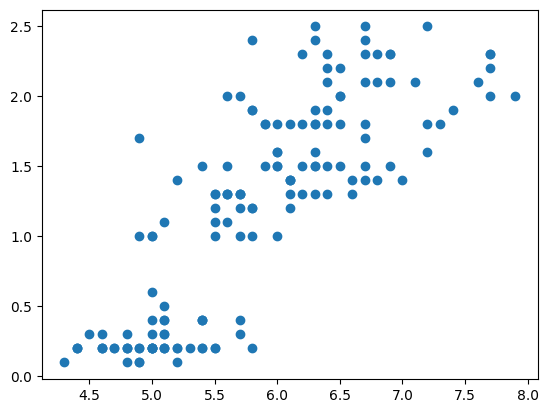

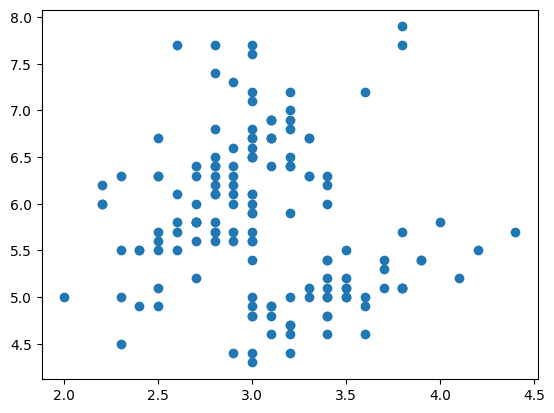

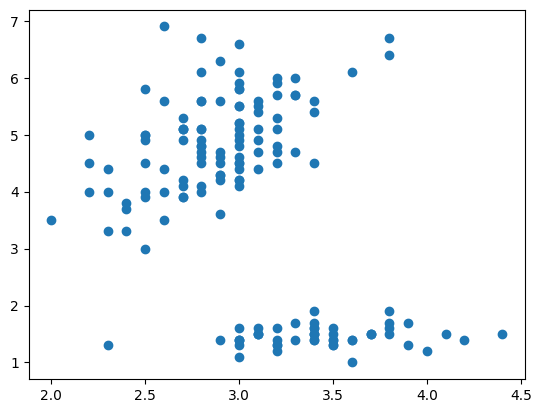

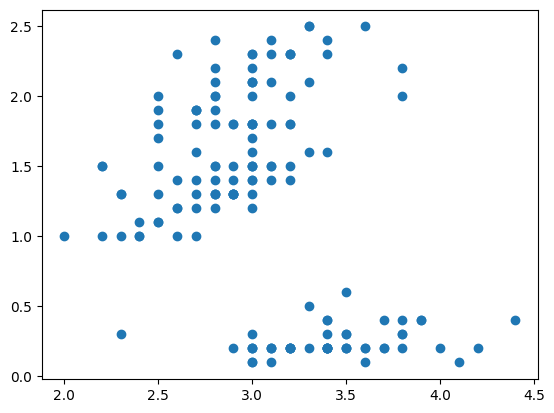

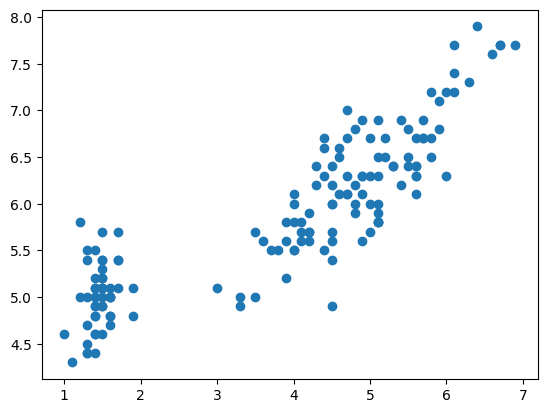

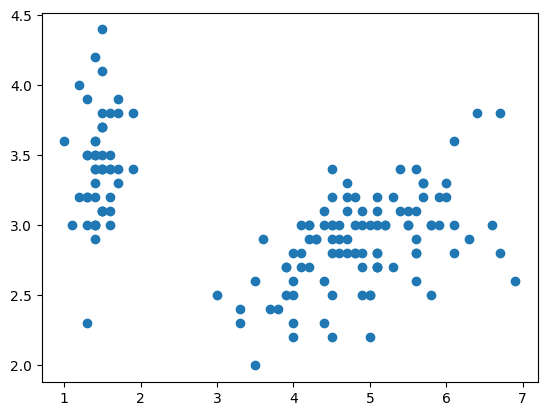

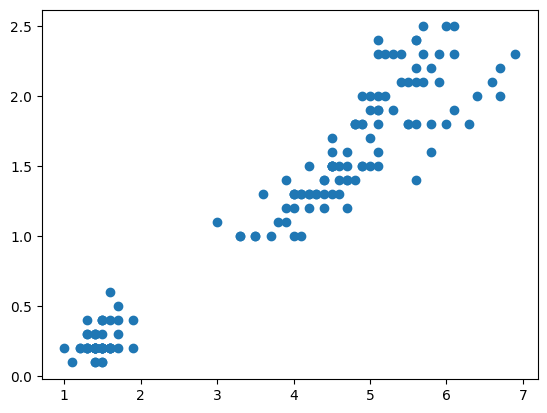

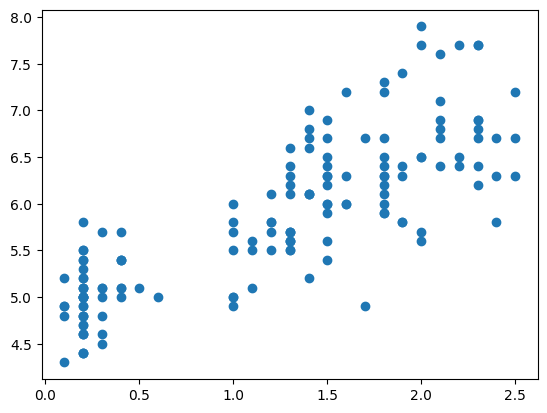

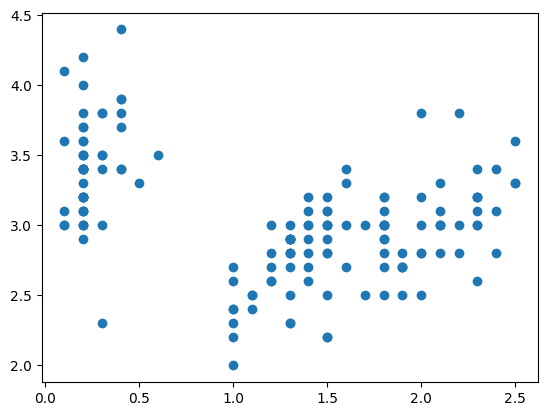

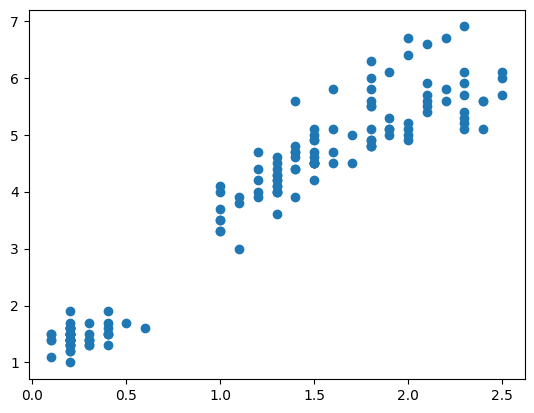

<Figure size 640x480 with 0 Axes>

In [11]:
s_len = []
s_wid = []
p_len = []
p_wid = []

for i in range(len(iris)):
    s_len.append(iris.data[i,0])
    s_wid.append(iris.data[i,1])
    p_len.append(iris.data[i,2])
    p_wid.append(iris.data[i,3])
    
for i in range(4):
    for j in range(4):
        if i!=j:
            plt.scatter(iris.data[:,i],iris.data[:,j])
            plt.figure()


**Problem 1b** Let's try to find clusters in this 4-dimensional feature space. Fit two different $K$-means models to the iris data, one with 2 clusters and one with 3 clusters. Make new pair plots but color the points by their cluster membership. According to your plots, which feature(s) is/are most correlated with the clusters? Why might that be?

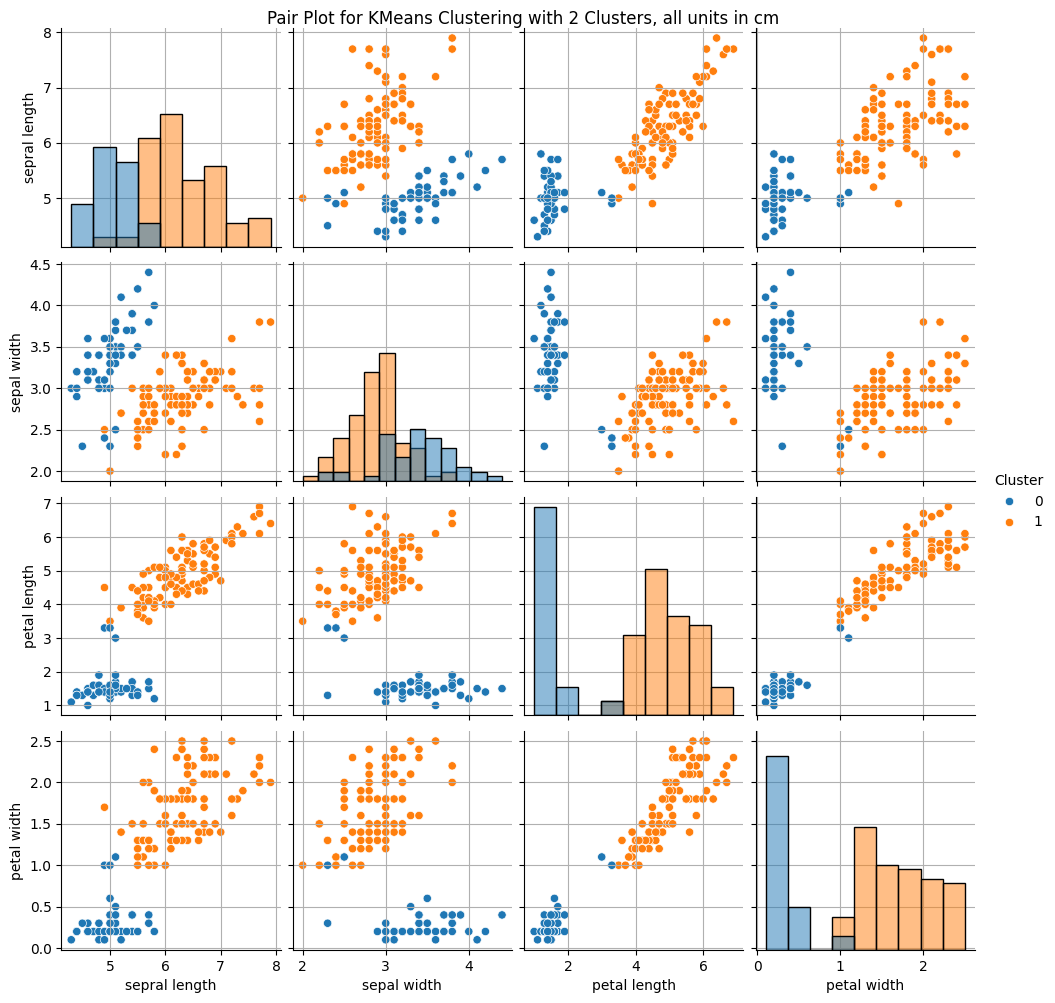

In [12]:
from sklearn.cluster import KMeans

#params = [[0,0,0,0],[1,1,1,1]]
#plt.title("Pair Plot for KMeans Clustering with 2 Clusters, all units in cm")
kmeans2 = KMeans( n_clusters = 2, n_init = 10 , max_iter = 500)
checker = kmeans2.fit_predict(iris_p)
iris_p_plot = iris_p.copy()
iris_p_plot['Cluster'] = checker.astype(str)
fig = sns.pairplot(iris_p_plot , hue = 'Cluster' ,diag_kind = "hist")
for ax in fig.axes.flatten():
    if ax is not None:
        ax.grid(True)
#plt.show()


plt.suptitle("Pair Plot for KMeans Clustering with 2 Clusters, all units in cm", y =1.)

plt.show()
#kmeans2.fit(iris_p)  # complete
#print('labels are : ', kmeans2.labels_)
#print("cluster centres are : ", kmeans2.cluster_centers_)

#iris_p2 = pd.DataFrame(iris['data'], columns =[ 'sepral length','sepal width','petal length','petal width'])
#sns.pairplot(iris_p2)

#clusters2 = kmeans2.fit(iris_p) # complete
#print(clusters2)

# plot

# repeat with 3 clusters

In [13]:
#**in the above case the length metrics, both sepal and petal are most correlated with the clusters, this is because they take a wider range of values, 5cm width whereas width is only 2.5cm width**

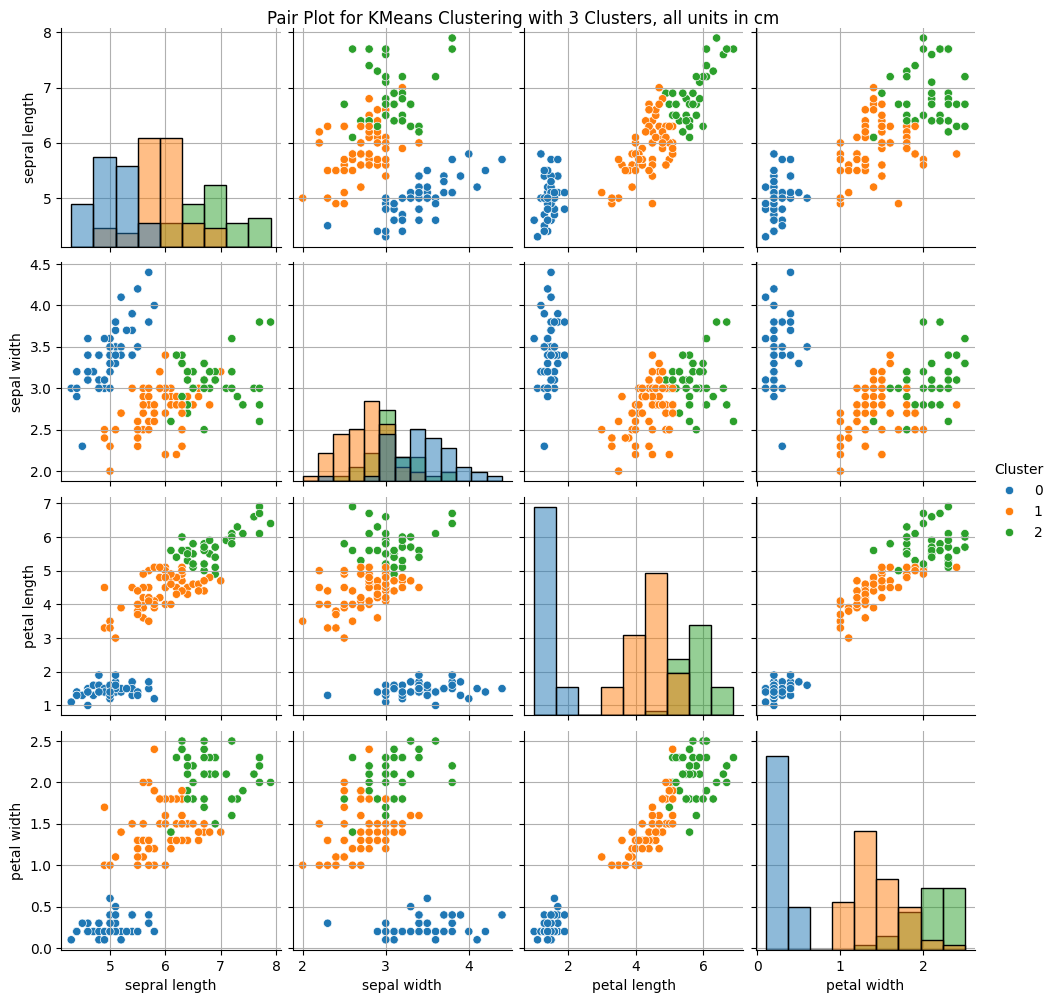

In [14]:
kmeans3 = KMeans( n_clusters = 3, n_init = 10 , max_iter = 500)
checker3 = kmeans3.fit_predict(iris_p)
iris_p_plot = iris_p.copy()
iris_p_plot['Cluster'] = checker3.astype(str)
fig2 = sns.pairplot(iris_p_plot , hue = 'Cluster' ,diag_kind = "hist")

for ax in fig2.axes.flatten():
    if ax is not None:
        ax.grid(True)

plt.suptitle("Pair Plot for KMeans Clustering with 3 Clusters, all units in cm", y =1.)
plt.show()

*Complete*


same again here, the clusters are most clearly visible on the length plots, less so on width

The truth is that the iris data set is fairly small and straightfoward. Nevertheless, we will now examine the clustering results after re-scaling the features. [Some algorithms are notoriously sensitive to the feature scaling, so it is important to know about this step.] Imagine you are classifying stellar light curves: the data set will include contact binaries with periods of $\sim 0.1 \; \mathrm{d}$ and Mira variables with periods of $\gg 100 \; \mathrm{d}$. Without re-scaling, this feature that covers 4 orders of magnitude may dominate all others in the final model projections.

The two most common forms of re-scaling are to rescale to a Gaussian with mean $= 0$ and variance $= 1$, or to rescale the min and max of the feature to $[0, 1]$. The best normalization is problem dependent. The [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module makes it easy to re-scale the feature set. **It is essential that the same scaling used for the training set be used for all other data run through the model.** The testing, validation, and field observations cannot be re-scaled independently. This would result in meaningless final classifications/predictions. 

**Problem 1c** Re-scale the features to normal distributions, and perform $K$-means clustering on the iris data. How do the results compare to those obtained earlier? 

In [15]:
iris_p

,sepral length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(iris_p)
scaler

print(scaler.mean_)
print(scaler.scale_)
print(iris.data[0])
iris_scaled = scaler.transform(iris_p)
iris_scaled = pd.DataFrame(iris_scaled, columns =[ 'sepral length','sepal width','petal length','petal width'])

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]
[5.1 3.5 1.4 0.2]


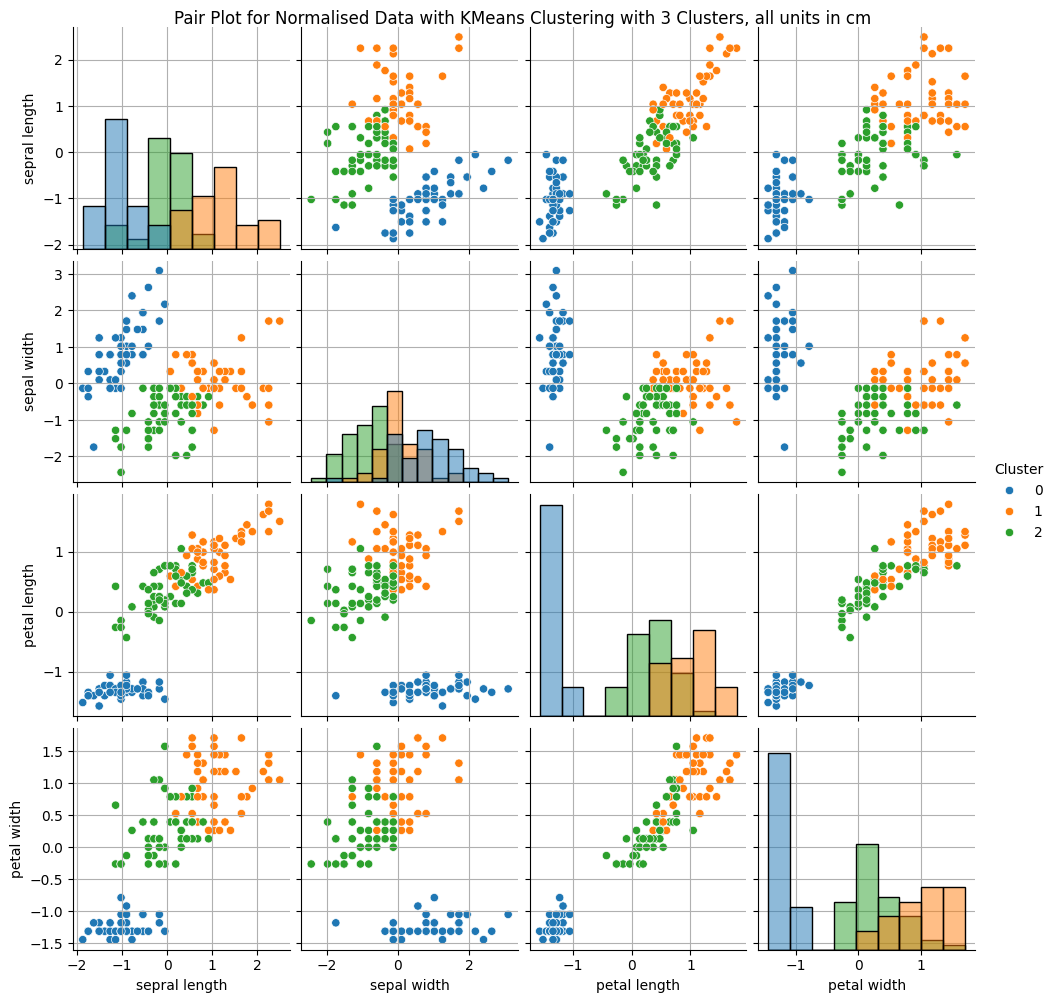

In [17]:
kmeans_n = KMeans( n_clusters = 3, n_init = 10 , max_iter = 500)
checker_n = kmeans_n.fit_predict(iris_scaled)
iris_scaled_plot = iris_scaled.copy()
iris_scaled_plot['Cluster'] = checker_n.astype(str)
fig_n = sns.pairplot(iris_scaled_plot , hue = 'Cluster' ,diag_kind = "hist")

for ax in fig_n.axes.flatten():
    if ax is not None:
        ax.grid(True)

plt.suptitle("Pair Plot for Normalised Data with KMeans Clustering with 3 Clusters, all units in cm", y =1.)
plt.show()

*Complete*

Not much difference when we normalise, maybe slightly more confused on the edge between the 2 more similar species

**Problem 2d** Let's try more complex feature engineering using principal component analysis. Find the principal components of the iris data set and cluster the data points according their projection onto the **top 2** principal components. How much of the variance do these two components capture?  
Plot the results both in the principal component space *and* in the original feature space. How do your results compare to the simpler preprocessing? Is there another benefit to using PCA?

In [18]:
iris_scaled

,sepral length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [19]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 2 )
#sklearn.decomposition.PCA(n_components = 2 , 
pca.fit(iris_scaled)
X_st = pca.transform(iris_scaled)

print()
print("mean is : ",pca.mean_)
print()
print("explained variance ratio by each parameter is : ",
      pca.explained_variance_ratio_, 
      " and total variance explained by both parameters is : ",
      np.sum(pca.explained_variance_ratio_),
      " which is ", np.sum(pca.explained_variance_ratio_)*100, "%")
print()
print("values are : ",pca.singular_values_)
print()
print("components are : ", pca.components_)
print()




mean is :  [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

explained variance ratio by each parameter is :  [0.72962445 0.22850762]  and total variance explained by both parameters is :  0.9581320720000166  which is  95.81320720000166 %

values are :  [20.92306556 11.7091661 ]

components are :  [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]



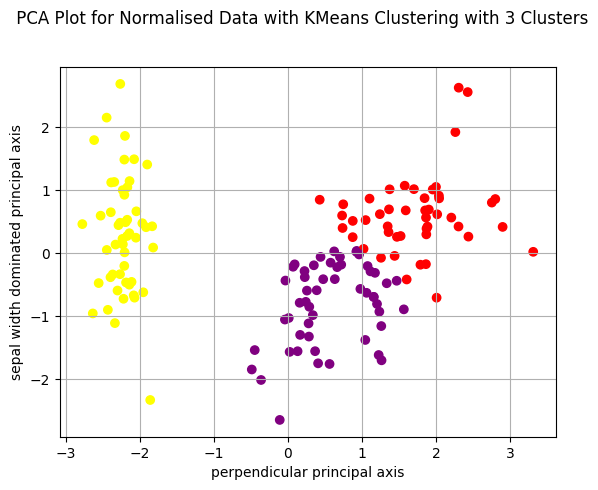

In [20]:
kmeans_pca = KMeans( n_clusters = 3, n_init = 10 , max_iter = 500)
checker_pca = kmeans_pca.fit_predict(X_st)

#hue = ['red' if i==0, 'yellow' elif i==1, 'purple' else if i==2 for i in checker_pca]

#for i in checker_pca:
 #   if i==0:
  #      hue = "red"
   # elif i==1:
    #    hue = "yellow"
    #else:
     #   hue = "purple"

colours = ['red' if c ==0 else 'yellow' if c == 1 else 'purple' for c in checker_pca]


plt.figure()
plt.scatter(X_st[:,0], X_st[:,1], c = colours)
plt.grid(True)

plt.suptitle(" PCA Plot for Normalised Data with KMeans Clustering with 3 Clusters", y =1.)
plt.ylabel("sepal width dominated principal axis")
plt.xlabel("perpendicular principal axis")
plt.show()

In [21]:
print(type(iris_scaled))
print(iris_scaled.shape) 
print(type(checker_pca))
print(checker_pca.shape)

<class 'pandas.core.frame.DataFrame'>
(150, 4)
<class 'numpy.ndarray'>
(150,)


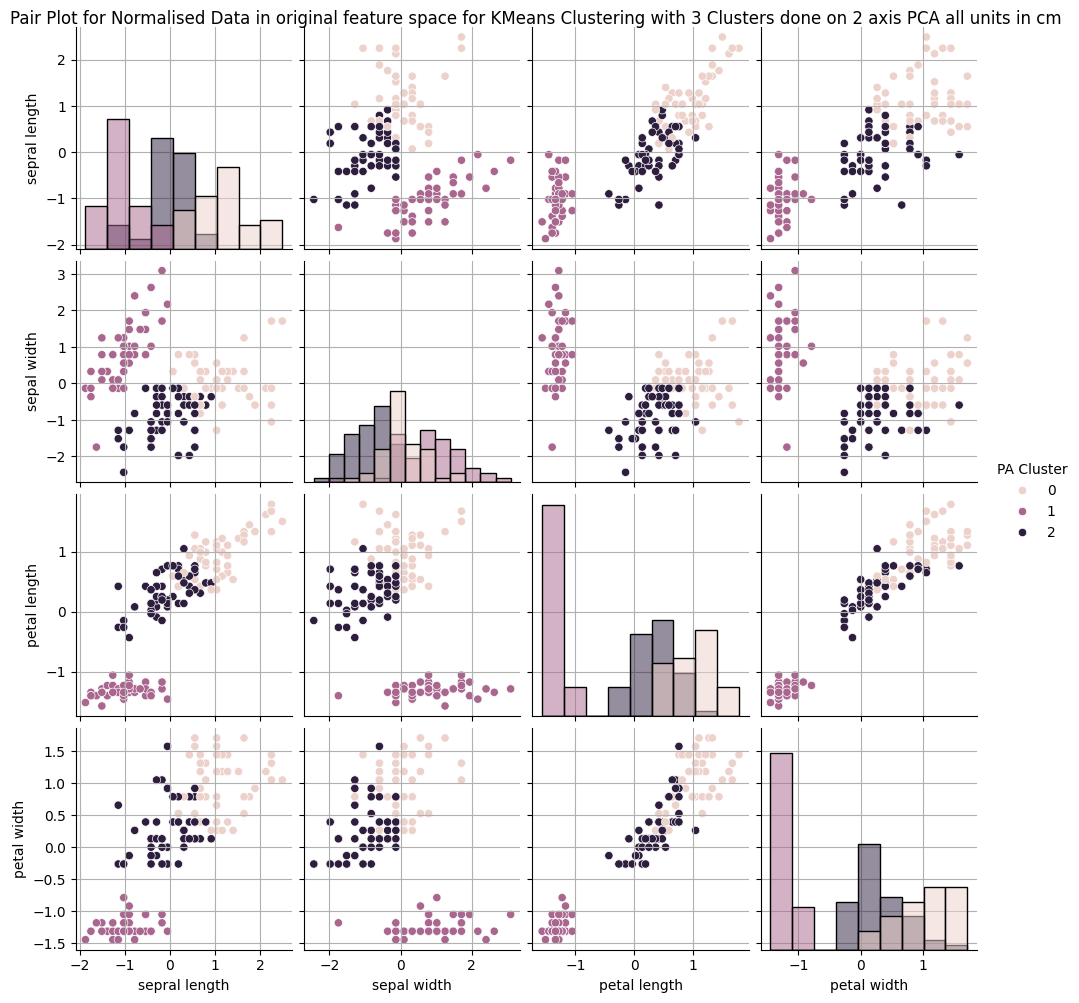

In [22]:
iris_scaled['PA Cluster'] = checker_pca

fig_PA = sns.pairplot(iris_scaled , hue = 'PA Cluster' ,diag_kind = "hist")

for ax in fig_PA.axes.flatten():
    if ax is not None:
        ax.grid(True)

plt.suptitle("Pair Plot for Normalised Data in original feature space for KMeans Clustering with 3 Clusters done on 2 axis PCA all units in cm", y =1.)
plt.show()

*Complete*

there doesnt seem to be much difference compared to the previous pairplots, 

there is more mixing between groups in the PCA plot, which only happened in some scatter plots of the previous pair plots

**Problem 2e** Our data set might include outliers that should not belong to any of the clusters, but $K$-means will always assign points to the nearest cluster. Instead, try clustering the iris data using an algorithm called `DBSCAN`. Play around with the tuning parameters to see how they affect the final clustering results. How does the use of `DBSCAN` compare to $K$-means? Can you obtain 3 clusters with `DBSCAN`?

*Note - DBSCAN labels outliers as `-1`, so all these points will be plotted as the same color.*


In [23]:
iris_scaled

,sepral length,sepal width,petal length,petal width,PA Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,0
148,0.432165,0.788808,0.933271,1.448832,0


In [24]:
from sklearn.cluster import DBSCAN

#iris_scaled

#iris_scaled = iris_scaled.drop('DBSCAN Cluster', axis=1)

In [25]:
from sklearn.cluster import DBSCAN

#iris_scaled = iris_scaled.drop('PA Cluster', axis=1)

dbscan_clustering = DBSCAN(eps = 1.6 , min_samples = 4).fit(iris_scaled)

iris_scaled['DBSCAN Cluster'] = dbscan_clustering.labels_

dbscan_clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

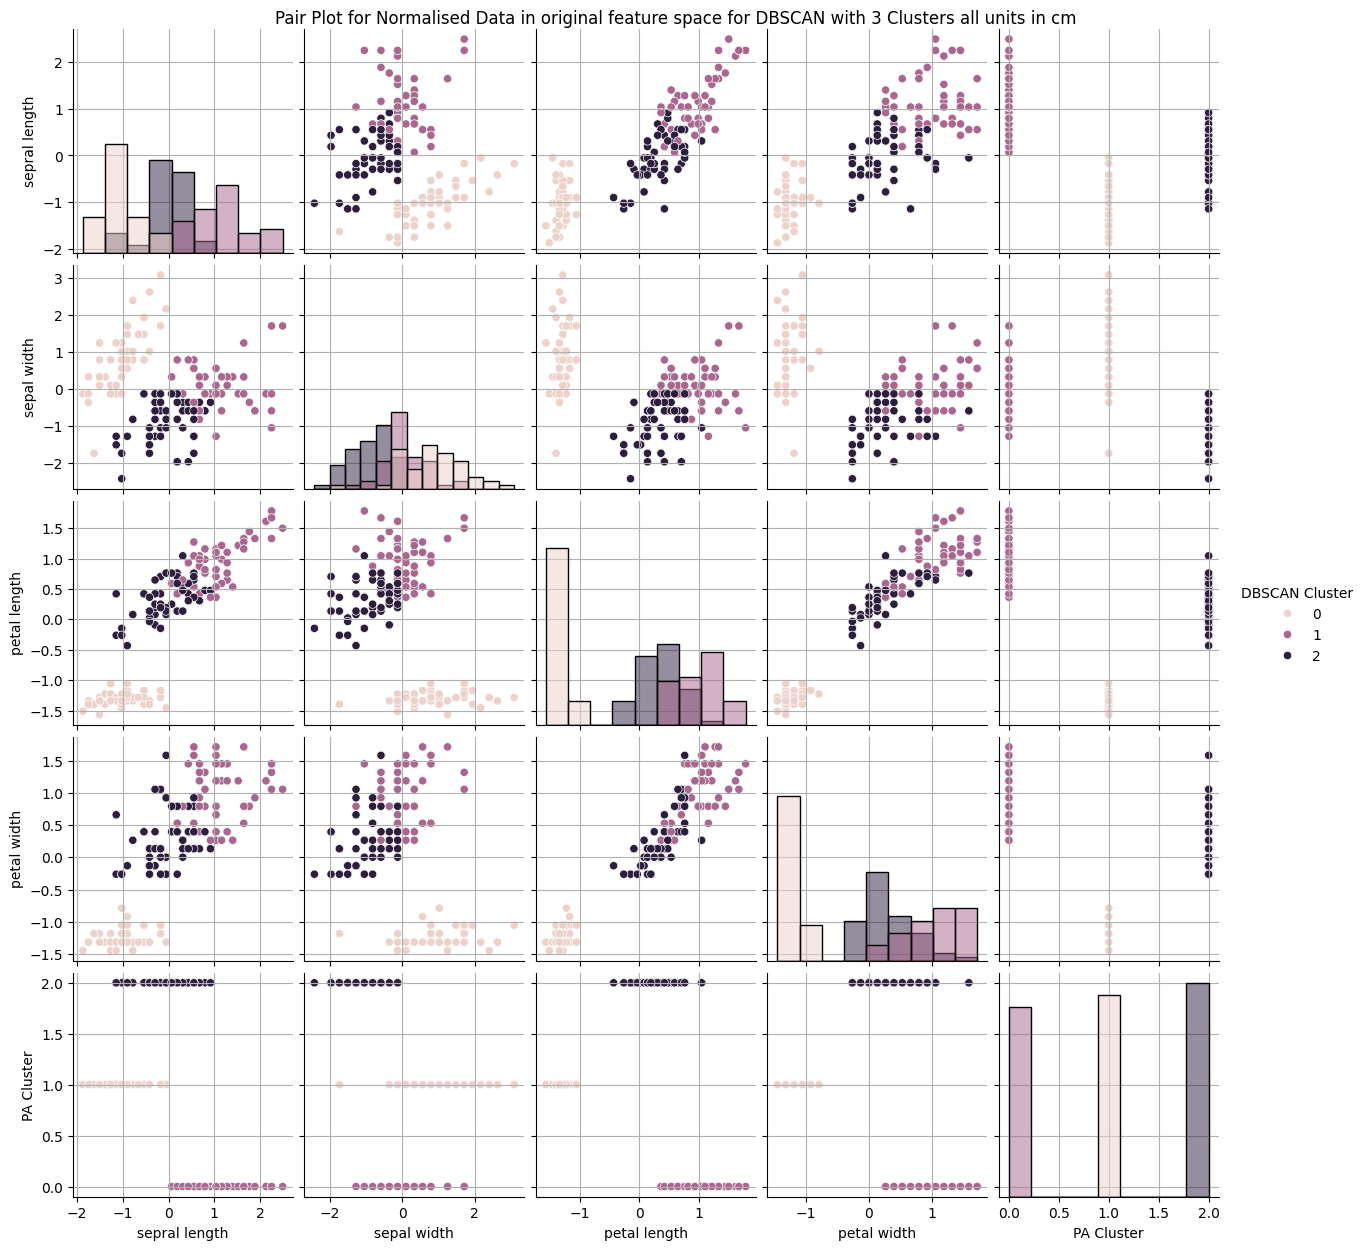

In [26]:
fig_DBSCAN = sns.pairplot(iris_scaled , hue = 'DBSCAN Cluster' ,diag_kind = "hist")

for ax in fig_DBSCAN.axes.flatten():
    if ax is not None:
        ax.grid(True)

plt.suptitle("Pair Plot for Normalised Data in original feature space for DBSCAN with 3 Clusters all units in cm", y =1.)
plt.show()

*I tried various combinations of hyper parameters but couldnt find a way to get the clustering to be like the 3 clusters we got from kmeans, raising the min_samples abouve the default value of 5 just made all the data points into noise and despite varying the value of eps I always got at least one data point that seems clearly to be in the wrong cluster, i managed to get an output with 0 noise according to the DBSCAN algorithm *

in this case cluster 2 seems to be like an "outer ring" for cluster 1, rather than the two circularish blobs in the kmeans clustering

# Problem 2) Correlation Function

Imagine we looked in the sky in a certain direction and saw a perfect circle of 50 galaxies with a radius of 1$^\circ$. This would imply highly correlated structure in the universe on the scale of $\sim 2^\circ$. Let's show this by calculating the correlation function for such a structure.

**Problem 2a** Generate the data set in question, the right ascension and declination ($x$ and $y$) for a circle of 50 galaxies centered on (0, 0) with radius $1^\circ$. Ignore spherical geometry for now and just assume everything is Euclidean for this small patch of sky.

(-4.0, 4.0)

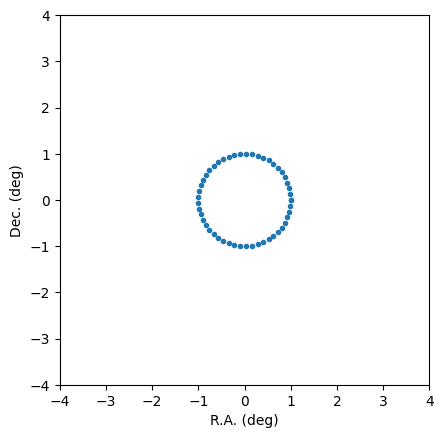

In [27]:
angle = np.linspace ( 0, 2*np.pi,50)

xx = 1 * np.cos(angle)

yy = 1 * np.sin(angle)

ax = plt.axes(aspect='equal')
ax.plot(xx, yy, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)

**Problem 2b** Generate a data set of randomly distributed points over the same patch of sky. Make sure your data set is $\sim20\times$ larger than the "observed" data set above. To avoid edge effects, I suggest using $-4<x,y<4$.

(-4.3, 4.3)

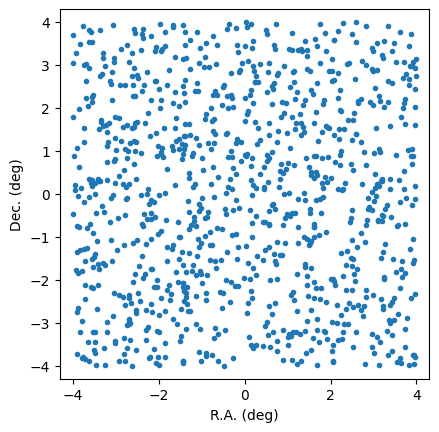

In [28]:
xr = -4 + 8    * np.random.rand(1000)
yr = -4 + 8 * np.random.rand(1000)

ax = plt.axes(aspect='equal')
ax.plot(xr, yr, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4.3, 4.3)
ax.set_ylim(-4.3, 4.3)

**Problem 2c** Calculate the distance between each pair of points in each data set. Plot histograms of each set of distances.  
*Hint:* exclude pairs matching the same point with itself.  
*Challenge:* try using broadcasting instead of loops to make each pair. 

In [43]:
circle_distances= []
for i in range(50):
    for j in range(50):
        if i != j :
            val = np.sqrt((xx[i]-xx[j])**2 + (yy[i]-yy[j])**2)
            if val > 1E-16:
                circle_distances.append(val)

random_distances= []
for i in range(1000):
    for j in range(1000):
        if i != j:
           val = np.sqrt((xr[i]-xr[j])**2 + (yr[i]-yr[j])**2)
           if val > 1E-4:
               random_distances.append(val)

print(len(circle_distances))
print(len(random_distances))

2450
999000


<function matplotlib.pyplot.show(close=None, block=None)>

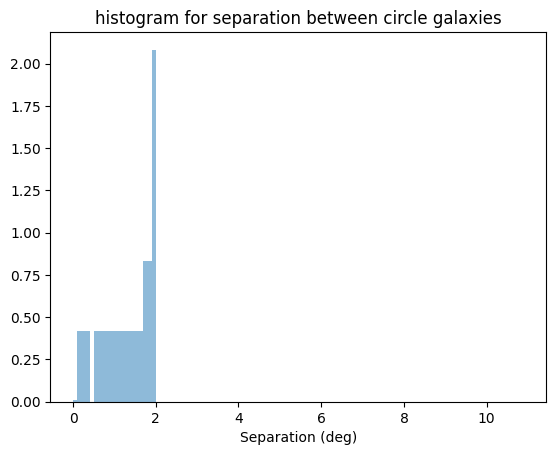

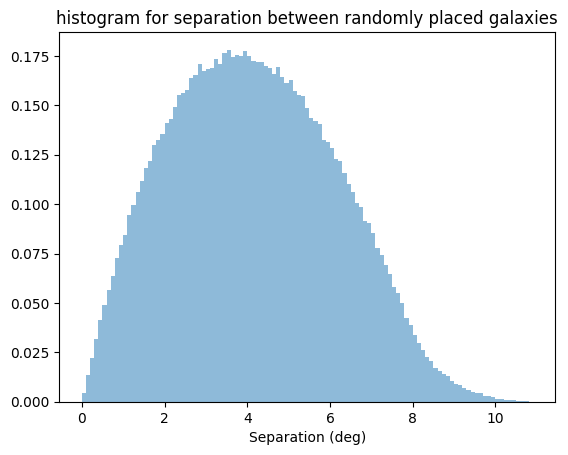

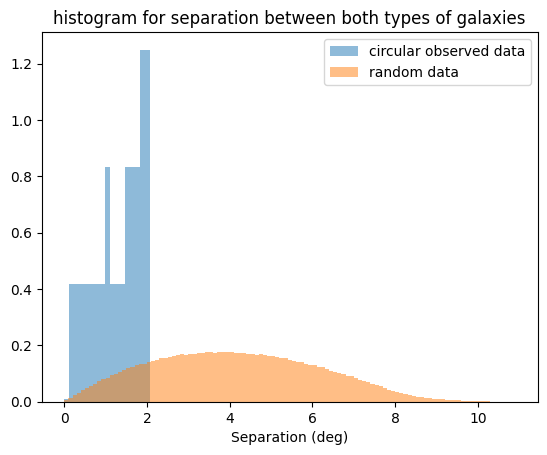

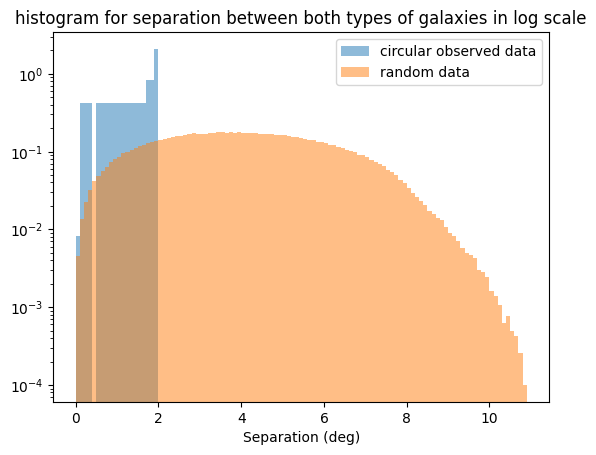

In [65]:
plt.title("histogram for separation between circle galaxies")
n_real, bins, _ = plt.hist(circle_distances, alpha =0.5,weights = np.ones(len(circle_distances))/(245),bins=np.arange(0, 11, 1e-1))
plt.xlabel('Separation (deg)')# complete
plt.figure()


plt.title("histogram for separation between randomly placed galaxies")
n_rand, bins, _ = plt.hist(random_distances, weights = np.ones(len(random_distances))/(99900), alpha = 0.5,bins=np.arange(0, 11, 1e-1))  # complete)
plt.xlabel('Separation (deg)')

plt.figure()


plt.title("histogram for separation between both types of galaxies")
plt.hist(circle_distances,bins=np.arange(0, 2.1, 12.2343e-2), alpha =0.5,  label = 'circular observed data',weights = np.ones(len(circle_distances))/(245))


plt.hist(random_distances, alpha = 0.5, bins=np.arange(0, 11, 1e-1), weights = np.ones(len(random_distances))/(99900), label = 'random data')
plt.legend()
plt.xlabel('Separation (deg)')

plt.figure()



plt.title("histogram for separation between both types of galaxies in log scale")
plt.hist(circle_distances,bins=np.arange(0, 11, 1e-1), alpha =0.5,weights = np.ones(len(circle_distances))/(245), label = 'circular observed data')

plt.hist(random_distances, alpha = 0.5,bins=np.arange(0, 11, 1e-1),weights = np.ones(len(random_distances))/(99900),  label = 'random data')
plt.yscale('log')
plt.xlabel('Separation (deg)')
plt.legend(loc = 'best')
plt.show

**Problem 2d** Estimate the two-point autocorrelation function for the real data, with the random data as a reference. Plot it as a function of separation. What did you learn about the large-scale structure in this portion of the sky?

In [66]:
print(n_real)
print()
print(n_rand)


[0.00816327 0.41632653 0.41632653 0.41632653 0.         0.41632653
 0.41632653 0.41632653 0.41632653 0.41632653 0.41632653 0.41632653
 0.41632653 0.41632653 0.41632653 0.41632653 0.41632653 0.83265306
 0.83265306 2.08163265 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

In [67]:
#ext_circle_distances =  np.array(np.array(circle_distances), np.zeros(len(random_distances) -len(circle_distances)))

#np.shape(ext_circle_distances)
#np.shape(random_distances)

#autocorr =  ext_circle_distances - np.array(random_distances)
#plt.stairs(autocorr, bins)
#plt.xlabel('Separation (deg)')
#plt.ylabel('Autocorrelation')

*Complete*

Text(0.5, 1.0, 'autocorrelation function for real vs random data')

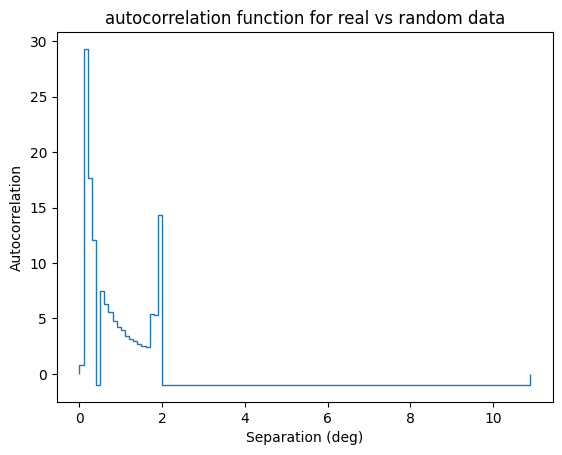

In [71]:
n_rand[n_rand ==0] = np.nan
val = n_real/n_rand
autocorr = val -1

plt.stairs(autocorr, bins)
plt.xlabel('Separation (deg)')
plt.ylabel('Autocorrelation')
plt.title("autocorrelation function for real vs random data")


In [72]:
#above is the autocorrelation function

#as the notebook predicted, the circle observed would imply very strong correlation on the scale of 2 degrees,
#however there are 2 peaks, one at exactly 2 degrees as all points are excatly 2 degrees away from one other point
#and anothe peak at just above 0 degrees, caused by the nearest neihbors of each point on the circle